In [1]:
import pandas as pd 
import glob
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
#data = pd.read_csv("./PM-Hortalizas-2019/PM-Hortaliza-Julio-2019/PM-Hortalizas-02-Julio-2019.csv")
#data['month']='Julio'

In [2]:
import xlrd
import csv
from os import sys

def csv_from_excel(excel_file, filename):
    workbook = xlrd.open_workbook(excel_file, encoding_override='windows-1252')
    all_worksheets = workbook.sheet_names()
    for worksheet_name in all_worksheets:
        worksheet = workbook.sheet_by_name(worksheet_name)
        if worksheet.nrows == 0: continue
        with open(filename, 'w+',newline='') as your_csv_file:
            wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)
            for rownum in range(worksheet.nrows):
                wr.writerow([entry for entry in worksheet.row_values(rownum)])
        your_csv_file.close() # save sheet of file

def csv_from_excel_first_sheet(excel_file, filename):
    #first function only gets last worksheet, lets return first worksheet instead
    workbook = xlrd.open_workbook(excel_file)
    all_worksheets = workbook.sheet_names()
    for worksheet_name in all_worksheets:
        worksheet = workbook.sheet_by_name(worksheet_name)
        if worksheet.nrows == 0: continue
        with open(filename, 'w+',newline='') as your_csv_file:
            wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)
            for rownum in range(worksheet.nrows):
                wr.writerow([entry for entry in worksheet.row_values(rownum)])
        your_csv_file.close()
        break# save sheet of file

In [3]:


csv_format = 'csv'
original_format = 'XLS'

# for day in days:
#     filename = path.format(day, month, csv_format)
#     if not os.path.isfile(filename):
#         #if file does not exist as csv then create it from xls or print error
#         orig_filename = path.format(day, month, original_format)
#         if not os.path.isfile(orig_filename):
#             print ("error file not found for {}".format(orig_filename))
#             continue
#         csv_from_excel(orig_filename)
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['fecha']= datetime. strptime("2019/{}/{}".format(months[month], day),"%Y/%m/%d")
#     li.append(df)

# frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
months = {
    'Ene': '01',
    'Feb': '02',
    'Marzo': '03',
    'Abril': '04',
    'Mayo': '05',
    'Junio': '06',
    'Julio': '07',
    'Agosto': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dic': '12'
}
def read_year():
    li = []
    for month in months:
        li.extend(read_month(month, months))
    return li


In [5]:
days = ["01","02","03","04","05", "06", "07", "08", "09","10","11","12","13","14","15", "16", "17", "18", "19",
            "20","21","22","23","24","25","26","27","28","29","30"]

def read_month(month, months):    
    path = "./PM-Hortalizas-2019/PM-Hortalizas-{}-2019/PM-Hortalizas-{}-{}-2019.{}"
    li = []
    for day in days:
        filename = path.format(month, day, month, csv_format)
        if not os.path.isfile(filename):
            #if file does not exist as csv then create it from xls or print error
            orig_filename = path.format(month, day, month, original_format)
            if not os.path.isfile(orig_filename):
                print ("error file not found for {}".format(orig_filename))
                continue
            csv_from_excel(orig_filename, filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        df['fecha']= datetime. strptime("2019/{}/{}".format(months[month], day),"%Y/%m/%d")
        li.append(df)
    return li

In [6]:
li = read_year()
frame = pd.concat(li, axis=0, ignore_index=True)

error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Ene-2019/PM-Hortalizas-01-Ene-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Ene-2019/PM-Hortalizas-05-Ene-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Ene-2019/PM-Hortalizas-06-Ene-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Ene-2019/PM-Hortalizas-12-Ene-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Ene-2019/PM-Hortalizas-13-Ene-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Ene-2019/PM-Hortalizas-19-Ene-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Ene-2019/PM-Hortalizas-20-Ene-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Ene-2019/PM-Hortalizas-26-Ene-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Ene-2019/PM-Hortalizas-27-Ene-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Feb-2019/PM-Hortalizas-02-Feb-2019.XLS
error file

error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Oct-2019/PM-Hortalizas-05-Oct-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Oct-2019/PM-Hortalizas-06-Oct-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Oct-2019/PM-Hortalizas-12-Oct-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Oct-2019/PM-Hortalizas-13-Oct-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Oct-2019/PM-Hortalizas-18-Oct-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Oct-2019/PM-Hortalizas-19-Oct-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Oct-2019/PM-Hortalizas-20-Oct-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Oct-2019/PM-Hortalizas-26-Oct-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Oct-2019/PM-Hortalizas-27-Oct-2019.XLS
error file not found for ./PM-Hortalizas-2019/PM-Hortalizas-Nov-2019/PM-Hortalizas-02-Nov-2019.XLS
error file

In [7]:

# 4 try inflation fix.
# 5 generate attribute with average price per month
# 6 determine wether every price is in season or not( or some grade)


# move file conversion to different file?
#FIRST READ for a month and get average
#TODO READ FROM ALL FILES FOR A YEAR AND GROUP DATA FOR EVERY VEGETABLE in a single data frame
# TODO Graphic and see if it fits with the season concept.

In [8]:
#TODO I will have to check this later
#read inflation file
#inflation_csv = "./PM-Hortalizas-2019/sh_ipc_aperturas.csv"
#inflation_path = "./PM-Hortalizas-2019/sh_ipc_aperturas.xls"
#csv_from_excel_first_sheet(inflation_path, inflation_csv)
#inflation_df = pd.read_csv(inflation_path, index_col=None, header=0,skiprows=4)
#fix dates should not lost on conversion from xls to csv


In [9]:
#inflation_df

In [10]:
def frame_for_veg(frame, veg_name):
    veg_frame = frame[frame['ESP'] == veg_name][['MOPK','MIPK','MAPK','fecha']]
    veg_frame['MAPK'] = veg_frame.groupby('fecha')['MAPK'].transform('mean')
    veg_frame['MOPK'] = veg_frame.groupby('fecha')['MOPK'].transform('mean')
    veg_frame['MIPK'] = veg_frame.groupby('fecha')['MIPK'].transform('mean')
    veg_frame.drop_duplicates(inplace=True)
    return veg_frame

In [11]:
#test with tomatos
#tomatos = frame_for_veg(frame, 'TOMATE') 
# frame[frame['ESP']=='TOMATE'][['MOPK','fecha']]
# tomatos['MOPK']= tomatos.groupby('fecha')['MOPK'].transform('mean')
# tomatos.drop_duplicates(inplace=True)

In [12]:
veg_names = ['ACELGA',
'ACELGA',
'ACELGA',
'ACELGA',
'ACHICORIA',
'ACHICORIA',
'ACUSAY',
'ACUSAY',
'AJO',
'AJO',
'AJO',
'AJO',
'AJO',
'AJO',
'AJO',
'AJO',
'AJO',
'AJO',
'ALBAHACA',
'ALBAHACA',
'ALCAUCIL',
'ALCAUCIL',
'APIO',
'APIO',
'APIO',
'ARVEJA',
'ARVEJA',
'ARVEJA',
'BATATA',
'BATATA',
'BATATA',
'BATATA',
'BERENJENA',
'BERENJENA',
'BERENJENA',
'BERENJENA',
'BERRO',
'BERRO',
'BROCOLI',
'BROCOLI',
'BROTE SOJA',
'BROTE SOJA',
'CARDO',
'CARDO',
'CEB.VERDEO',
'CEB.VERDEO',
'CEB.VERDEO',
'CEB.VERDEO',
'CEBOLLA',
'CEBOLLA',
'CEBOLLA',
'CEBOLLA',
'CEBOLLA',
'CEBOLLA',
'CEBOLLA',
'CEBOLLA',
'CHAUCHA',
'CHAUCHA',
'CHAUCHA',
'CHAUCHA',
'CHOCLO',
'CHOCLO',
'CHOCLO',
'CIBOULLE',
'CIBOULLE',
'COLIFLOR',
'COLIFLOR',
'CURCUMA',
'CURCUMA',
'ESCAROLA',
'ESCAROLA',
'ESCAROLA',
'ESPARRAGO',
'ESPARRAGO',
'ESPINACA',
'ESPINACA',
'HINOJO',
'HINOJO',
'HONGOS',
'HONGOS',
'HONGOS',
'HONGOS',
'JENGIBRE',
'JENGIBRE',
'KALE',
'KALE',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'LECHUGA',
'MANDIOCA',
'MANDIOCA',
'MENTA',
'MENTA',
'OREGANO',
'OREGANO',
'PACK CHOY',
'PACK CHOY',
'PAPA',
'PAPA',
'PAPA',
'PAPA',
'PAPA',
'PAPA',
'PAPA',
'PAPA',
'PEPINO',
'PEPINO',
'PEPINO',
'PEREJIL',
'PEREJIL',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PIMIENTO',
'PUERRO',
'PUERRO',
'PUERRO',
'RABANITO',
'RABANITO',
'RADICCHIO',
'RADICCHIO',
'RADICHETA',
'RADICHETA',
'RADICHETA',
'REMOLACHA',
'REMOLACHA',
'REMOLACHA',
'REP.BRUSEL',
'REP.BRUSEL',
'REPOLLO',
'REPOLLO',
'REPOLLO',
'REPOLLO',
'ROMERO',
'ROMERO',
'RUCULA',
'RUCULA',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMATE',
'TOMILLO',
'TOMILLO',
'ZANAHORIA',
'ZANAHORIA',
'ZANAHORIA',
'ZANAHORIA',
'ZANAHORIA',
'ZAPALLITO',
'ZAPALLITO',
'ZAPALLITO',
'ZAPALLITO',
'ZAPALLITO',
'ZAPALLITO',
'ZAPALLO',
'ZAPALLO',
'ZAPALLO',
'ZAPALLO',
'ZAPALLO',
'ZAPALLO',
'ZAPALLO',
'ZAPALLO',
'ZAPALLO']

veg_names = list(dict.fromkeys(veg_names))


In [13]:
def generate_in_season_attribute(df, range):
    df = df.sort_values(by='MOPK')
    in_season_dates = df['fecha'][:range]
    df['in_season'] = df['fecha'].isin(in_season_dates)
    return df


In [14]:
plt.rcParams["figure.figsize"] = (20,3)
def show_date_plot(frame, name_attr):
    print(name_attr)
    ax = plt.subplot(111)
    colors = ['r' if f else 'b' for f in frame['in_season']]
    ax.bar(frame['fecha'],frame[name_attr], width=10,color=colors)
    ax.xaxis_date()
    plt.show()

In [15]:
# correlation between MAPK MIPK and MOPK is quite high, close to 1.

0.9910894724079339
0.9905755568515062
MODE: 7.9775
MEAN: 11.803578838174273
MEDIAN: 12.172500000000001
ACELGA
-
MOPK


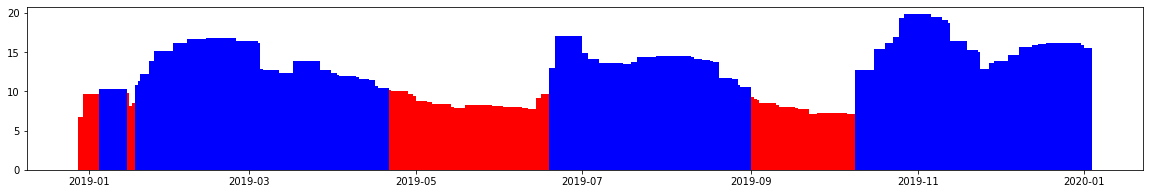

0.9515219100076105
0.9464549645380465
MODE: 12.5
MEAN: 11.027636363636363
MEDIAN: 11.0
ACHICORIA
-
MOPK


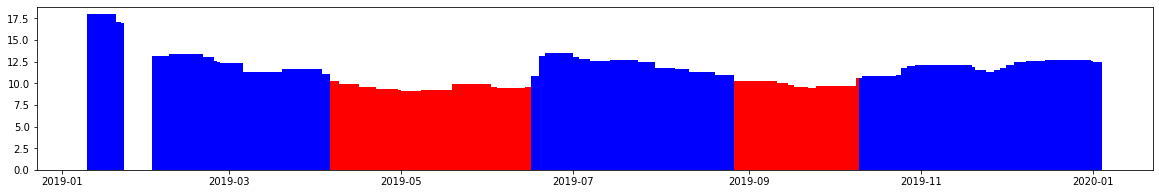

0.9926993113453405
0.9926789221789445
MODE: 22.01
MEAN: 14.210042918454938
MEDIAN: 12.52
ACUSAY
-
MOPK


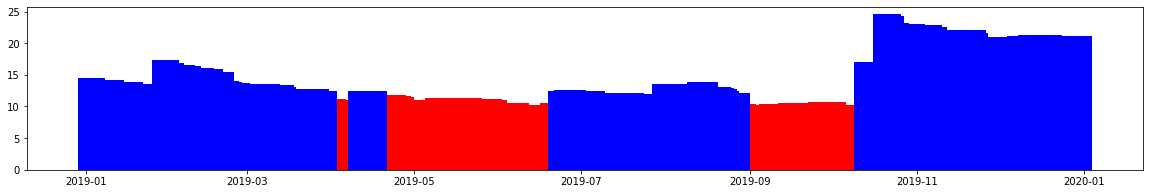

0.9843715653714901
0.9843383351318851
MODE: 69.86285714285715
MEAN: 96.7499648193616
MEDIAN: 101.36944444444444
AJO
-
MOPK


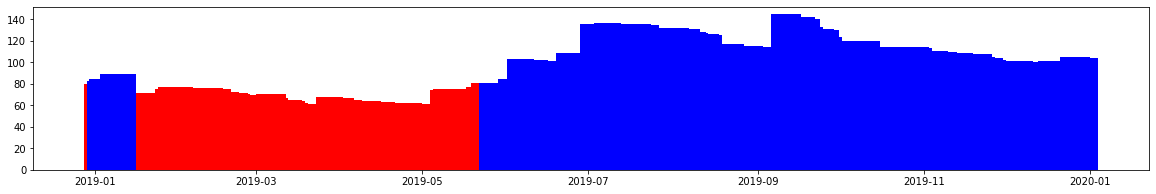

0.999593389020769
0.9993421772046815
MODE: 11.0
MEAN: 13.846507246376811
MEDIAN: 10.5
ALBAHACA
-
MOPK


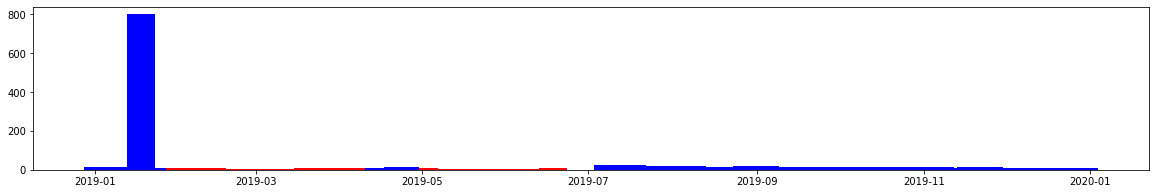

0.9184893441727979
0.9135011380532148
MODE: 31.88
MEAN: 39.700426997245174
MEDIAN: 37.81
ALCAUCIL
-
MOPK


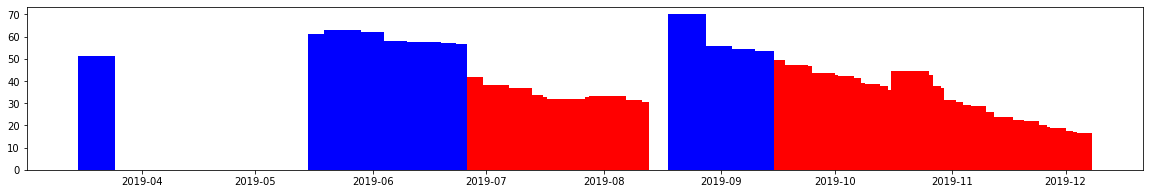

0.9879776911081567
0.9783168888971658
MODE: 40.3
MEAN: 29.568118948824342
MEDIAN: 28.346666666666664
APIO
-
MOPK


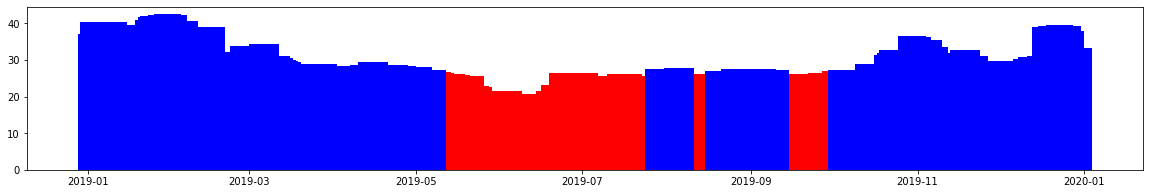

0.913659372387769
0.9281301641656988
MODE: 34.66
MEAN: 37.39603886397608
MEDIAN: 34.0
ARVEJA
-
MOPK


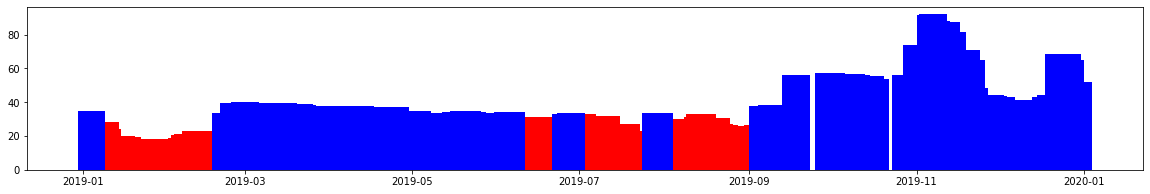

0.9458501637430616
0.9498294995604201
MODE: 15.469999999999999
MEAN: 19.923023513139693
MEDIAN: 18.9625
BATATA
-
MOPK


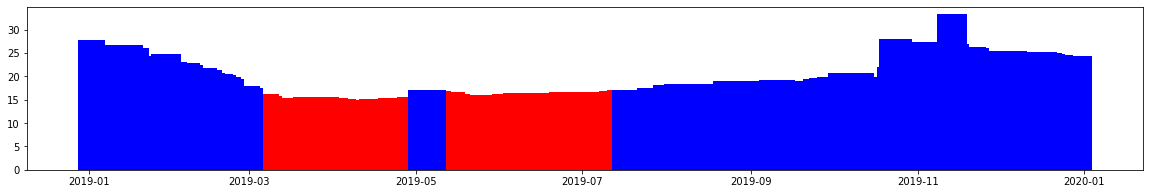

0.9827054831022836
0.9772720863185588
MODE: 9.016666666666667
MEAN: 27.564172890733058
MEDIAN: 24.80666666666667
BERENJENA
-
MOPK


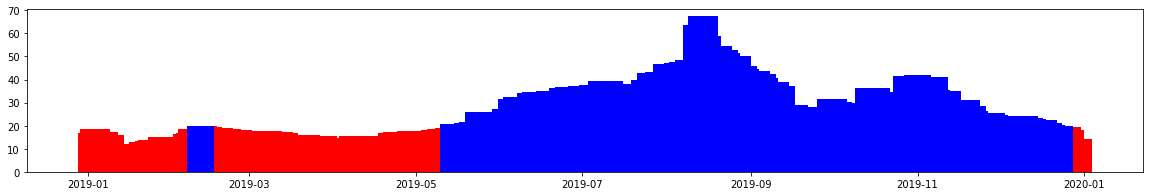

0.9426218655159542
0.9467085158053874
MODE: 22.01
MEAN: 24.92546296296296
MEDIAN: 23.259999999999998
BERRO
-
MOPK


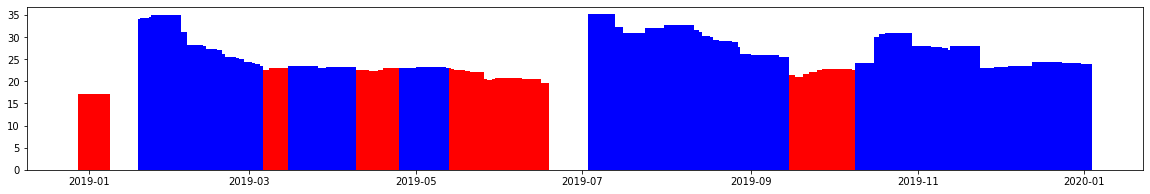

0.9633968194873933
0.9579823588910812
MODE: 19.31
MEAN: 33.335
MEDIAN: 31.025
BROCOLI
-
MOPK


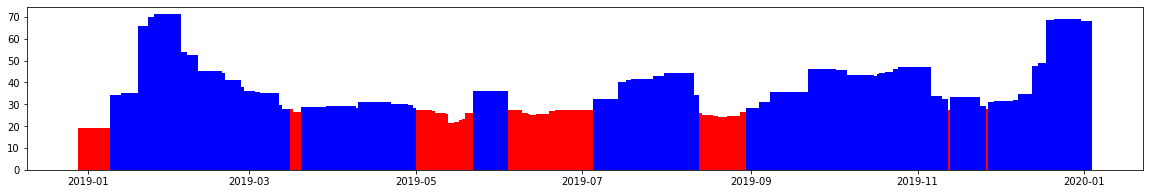

0.9879446941000071
0.979144097770761
MODE: 85.0
MEAN: 75.2447767857143
MEDIAN: 76.775
BROTE SOJA
-
MOPK


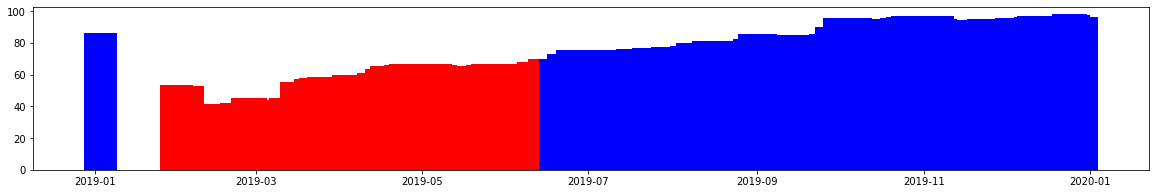

0.9531036543384767
0.9050272181687029
MODE: 15.28
MEAN: 16.658490566037738
MEDIAN: 16.05
CARDO
-
MOPK


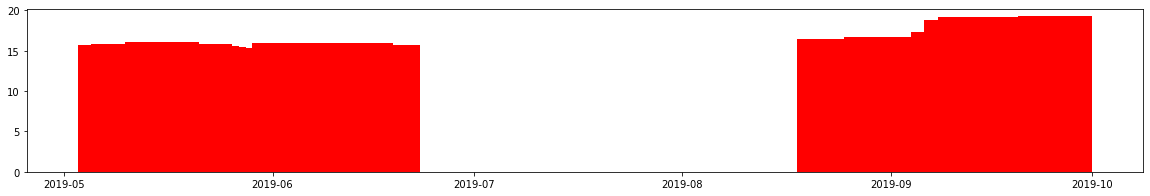

0.9929163062552455
0.9797968113318484
MODE: 34.56666666666666
MEAN: 37.42087482710926
MEDIAN: 32.6875
CEB.VERDEO
-
MOPK


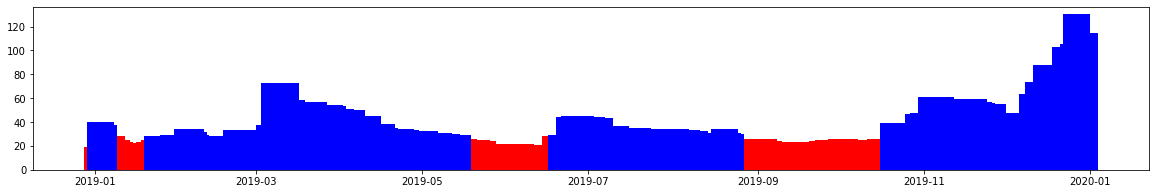

0.99774421655443
0.9946894140193422
MODE: 11.76
MEAN: 17.27338042547586
MEDIAN: 13.272
CEBOLLA
-
MOPK


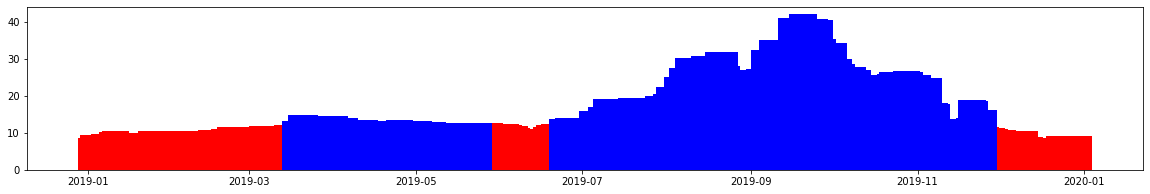

0.9865827849900797
0.9855126617964591
MODE: 17.2325
MEAN: 45.08663819444444
MEDIAN: 41.63
CHAUCHA
-
MOPK


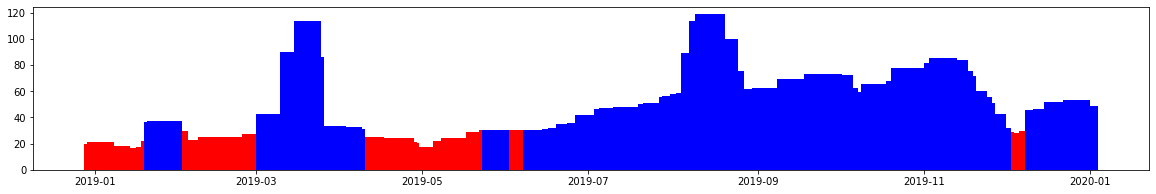

0.9842060121136716
0.9831851547195946
MODE: 15.219999999999999
MEAN: 29.891438450899035
MEDIAN: 22.33
CHOCLO
-
MOPK


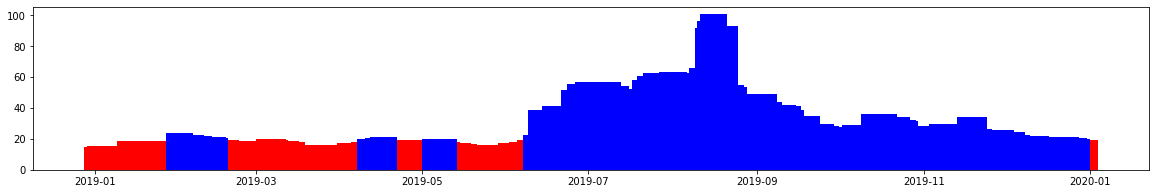

0.9539230696397012
0.9801421747523292
MODE: 120.0
MEAN: 137.1786842105263
MEDIAN: 131.1
CIBOULLE
-
MOPK


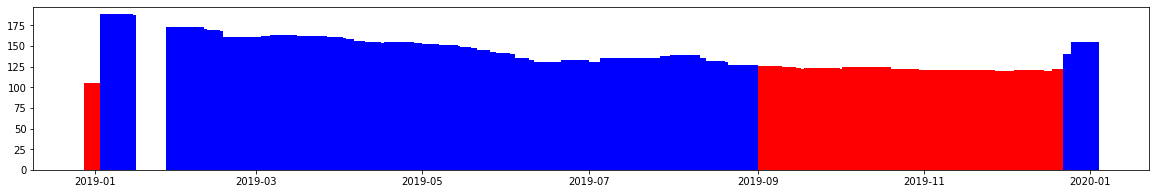

0.9280385807406089
0.9212852162744881
MODE: 14.0
MEAN: 14.191390168970814
MEDIAN: 14.57
COLIFLOR
-
MOPK


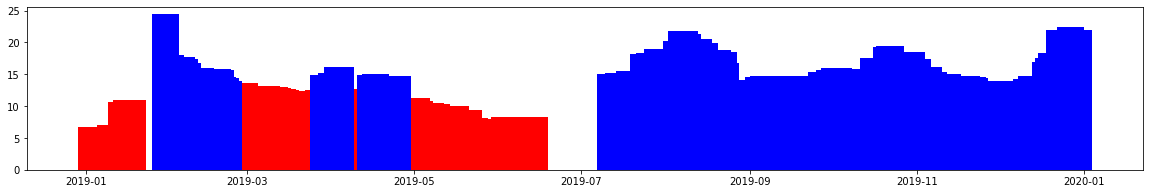

0.9475008454189346
0.9221354472810497
MODE: 45.0
MEAN: 52.29570833333334
MEDIAN: 51.125
CURCUMA
-
MOPK


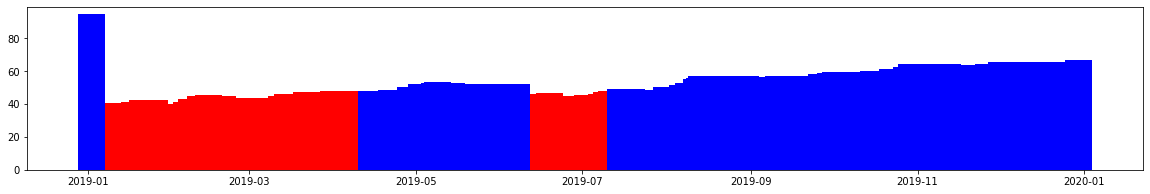

0.9468997157207655
0.9176775306987344
MODE: 20.44
MEAN: 20.080580357142853
MEDIAN: 20.503333333333337
ESCAROLA
-
MOPK


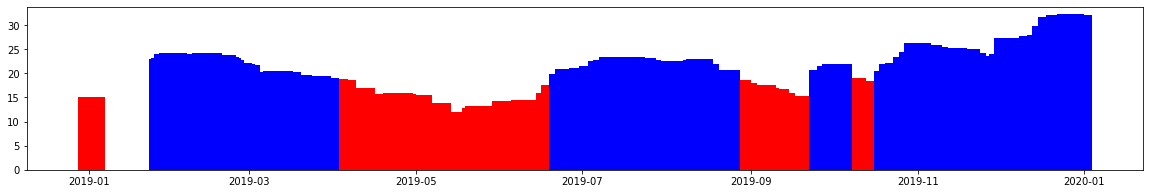

0.965260503641766
0.8676334242650946
MODE: 290.0
MEAN: 110.39518000000002
MEDIAN: 52.0
ESPARRAGO
-
MOPK


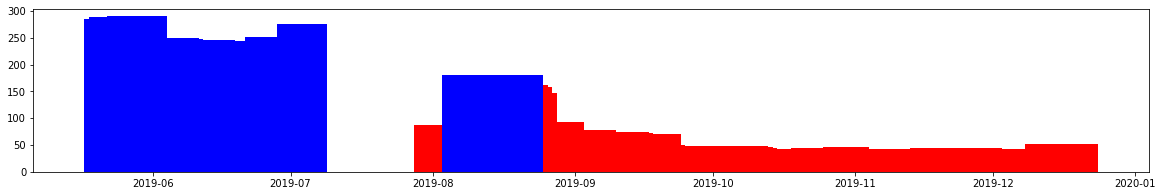

0.9508901785410583
0.9610284123709505
MODE: 16.22
MEAN: 37.3927939142462
MEDIAN: 37.6
ESPINACA
-
MOPK


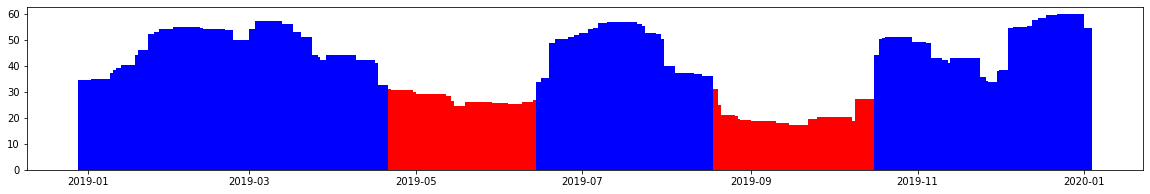

0.9670194309888864
0.9594377595698887
MODE: 10.34
MEAN: 10.493583333333333
MEDIAN: 10.4
HINOJO
-
MOPK


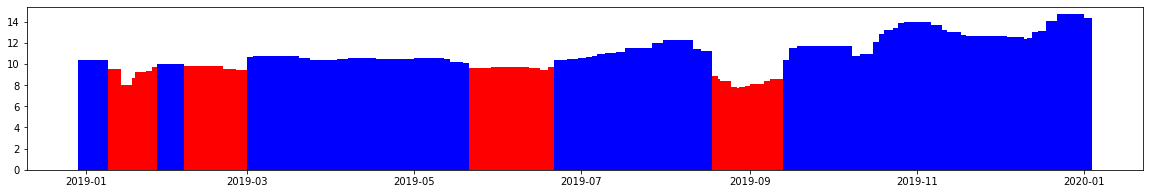

0.9792012318207565
0.9838094739568188
MODE: 246.4175
MEAN: 266.26857192254494
MEDIAN: 266.18
HONGOS
-
MOPK


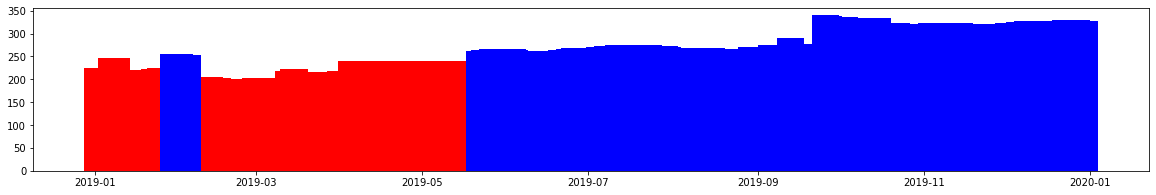

0.9464997523652589
0.9571021480389238
MODE: 95.0
MEAN: 84.77861687413555
MEDIAN: 80.2
JENGIBRE
-
MOPK


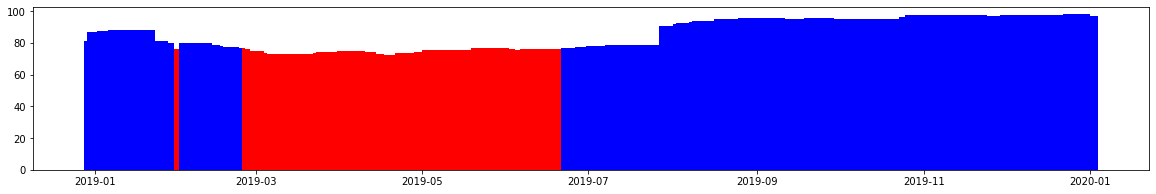

0.9794430197812285
0.9610885210980661
MODE: 55.0
MEAN: 63.26182608695651
MEDIAN: 56.4
KALE
-
MOPK


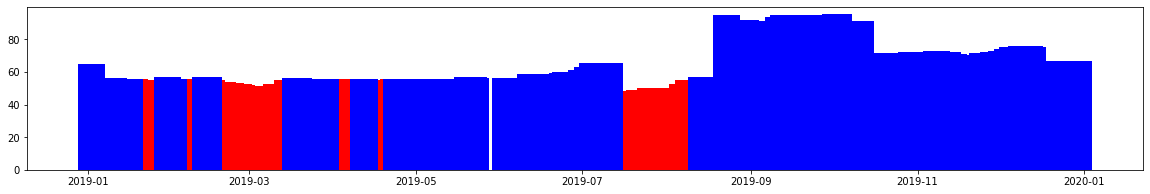

0.9989194522448698
0.99863954049063
MODE: 12.807999999999998
MEAN: 26.060146219502027
MEDIAN: 24.02
LECHUGA
-
MOPK


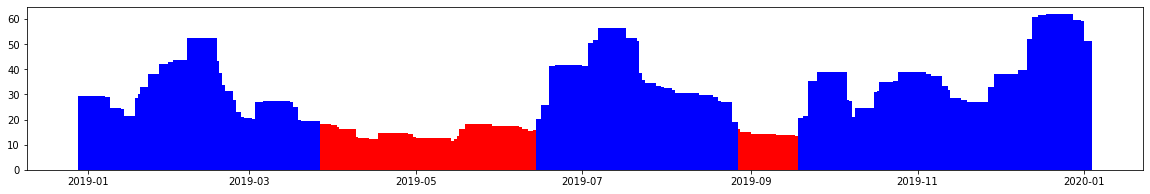

0.986989607218562
0.9883568007732483
MODE: 10.5
MEAN: 12.563419540229884
MEDIAN: 10.969999999999999
MANDIOCA
-
MOPK


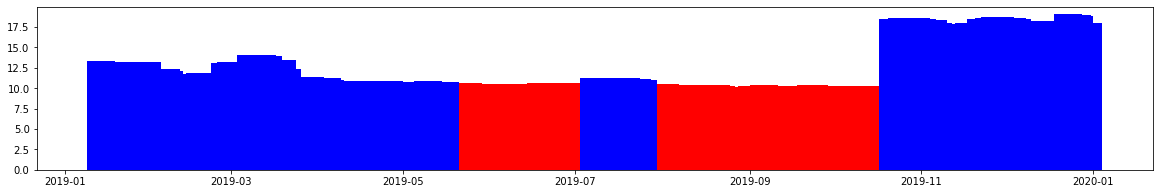

0.9857685282889849
0.9797906549517413
MODE: 115.0
MEAN: 125.78106060606062
MEDIAN: 124.69
MENTA
-
MOPK


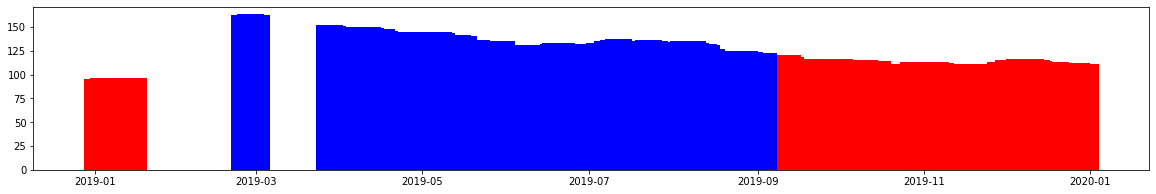

0.9888658309884165
0.9907693801779138
MODE: 111.0
MEAN: 134.6539075630252
MEDIAN: 130.0
OREGANO
-
MOPK


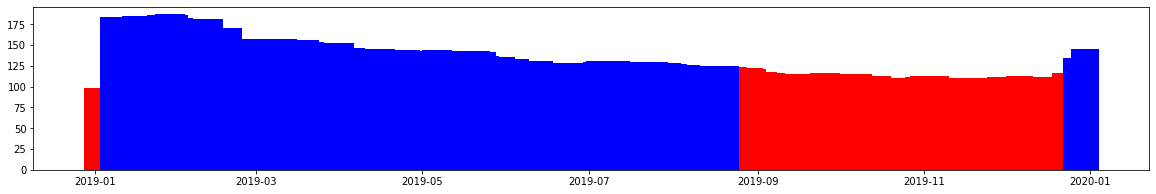

0.7926968630422321
0.8281968201510059
MODE: 35.0
MEAN: 35.04160714285714
MEDIAN: 35.04
PACK CHOY
-
MOPK


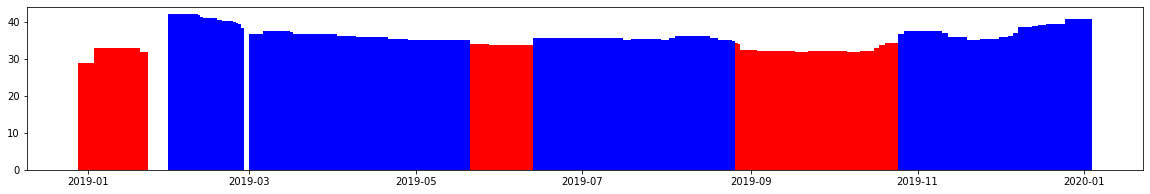

0.9876349025558029
0.9907002058698586
MODE: 6.5
MEAN: 11.318307218599749
MEDIAN: 11.3
PAPA
-
MOPK


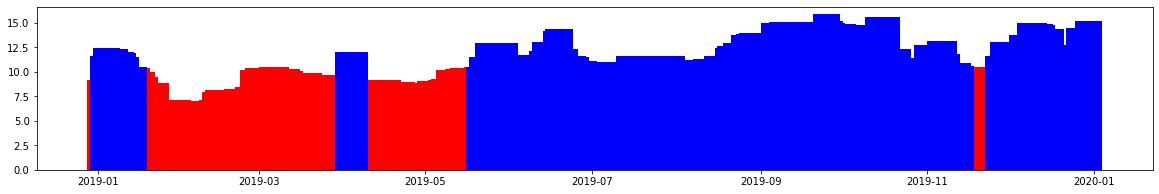

0.9740453146909183
0.9774919126632863
MODE: 11.7975
MEAN: 22.002536805555557
MEDIAN: 20.7
PEPINO
-
MOPK


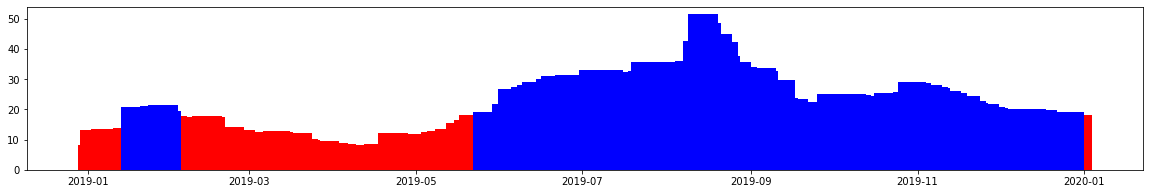

0.9794026785882172
0.9691430469437337
MODE: 29.81
MEAN: 31.868567375886524
MEDIAN: 29.65
PEREJIL
-
MOPK


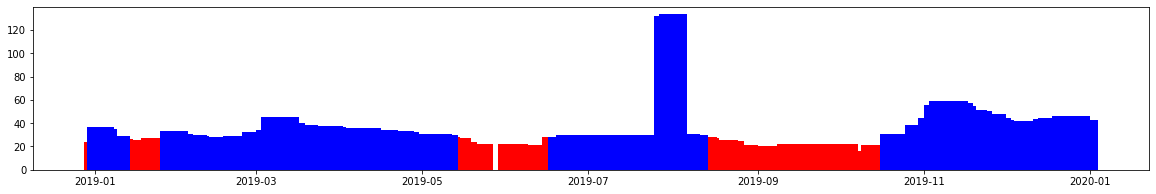

0.996917414872588
0.9972630950554754
MODE: 27.3825
MEAN: 50.414062122352064
MEDIAN: 47.13833333333334
PIMIENTO
-
MOPK


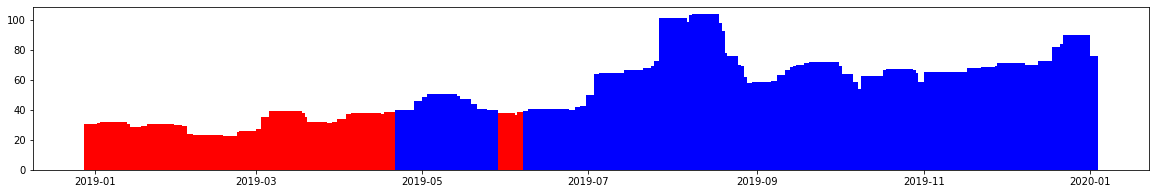

0.9906893801063528
0.9857020330646872
MODE: 30.04
MEAN: 34.28691562932227
MEDIAN: 32.20666666666667
PUERRO
-
MOPK


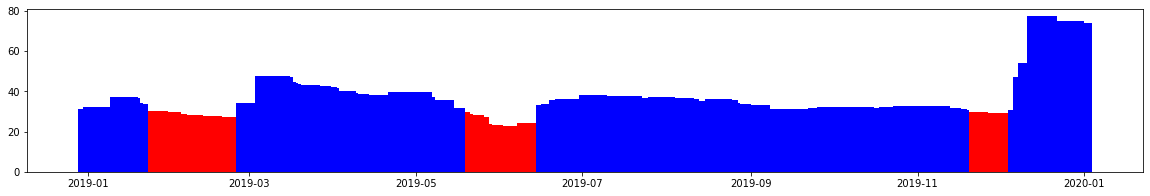

0.9392991930617705
0.9357203785569012
MODE: 22.0
MEAN: 25.34412844036697
MEDIAN: 25.145
RABANITO
-
MOPK


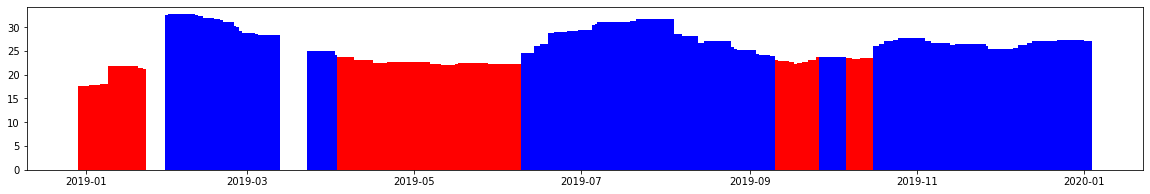

0.975883887471326
0.9757592603461781
MODE: 60.0
MEAN: 81.27969162995593
MEDIAN: 90.02
RADICCHIO
-
MOPK


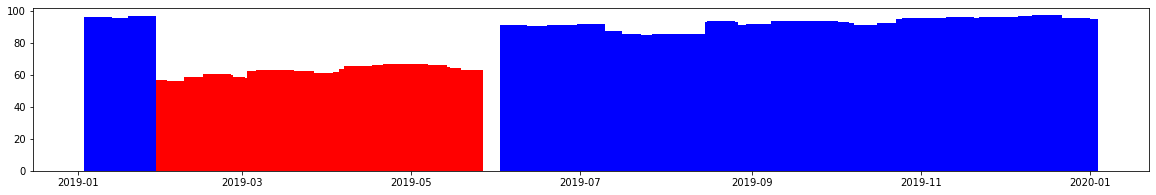

0.9933302637243232
0.9946560120139825
MODE: 24.23
MEAN: 31.154246196403875
MEDIAN: 27.596666666666664
RADICHETA
-
MOPK


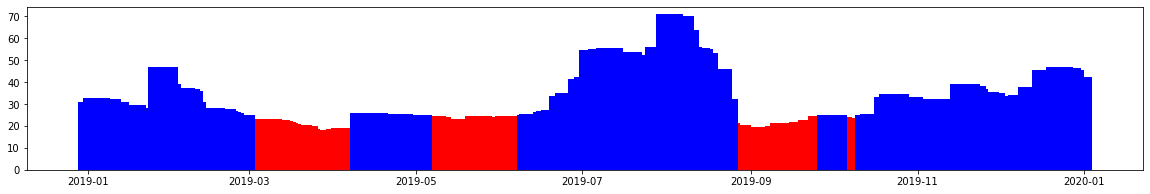

0.9812304995863793
0.9797432071425736
MODE: 6.37
MEAN: 10.090477178423237
MEDIAN: 8.806666666666667
REMOLACHA
-
MOPK


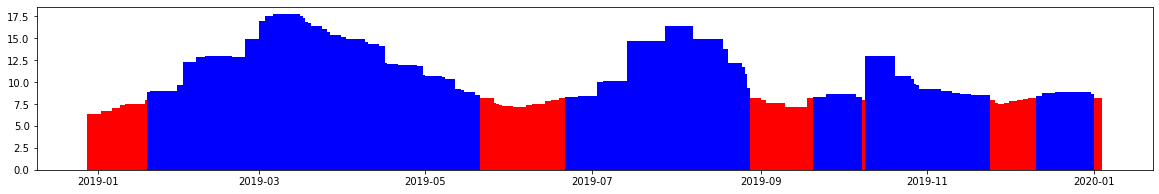

0.9831514022180936
0.9696370275168438
MODE: 85.0
MEAN: 72.23357142857144
MEDIAN: 64.19
REP.BRUSEL
-
MOPK


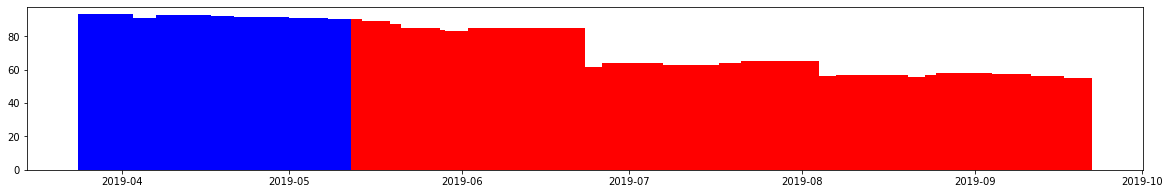

0.9438905329054552
0.9523097689260407
MODE: 6.68
MEAN: 8.516013139695712
MEDIAN: 8.646666666666667
REPOLLO
-
MOPK


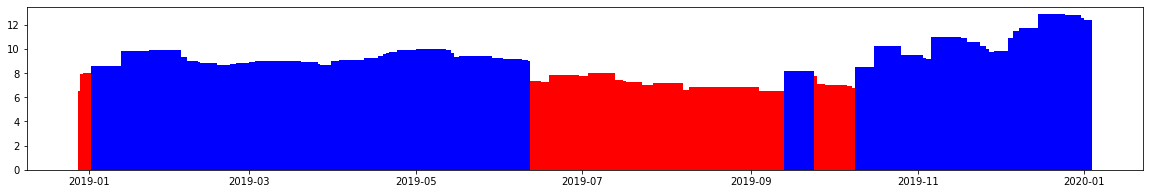

0.981789003112042
0.9882852362488668
MODE: 115.0
MEAN: 134.04537815126048
MEDIAN: 129.57
ROMERO
-
MOPK


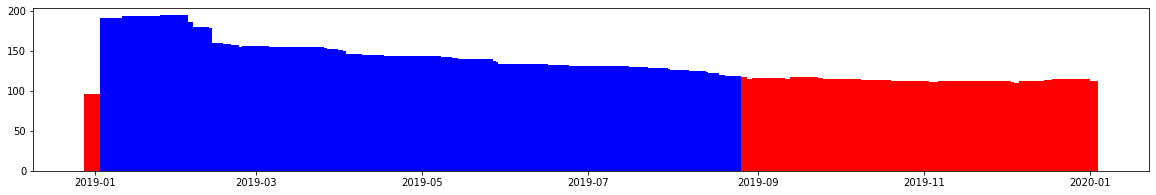

0.9888273862353203
0.9929395145499611
MODE: 55.0
MEAN: 83.60502092050208
MEDIAN: 83.73
RUCULA
-
MOPK


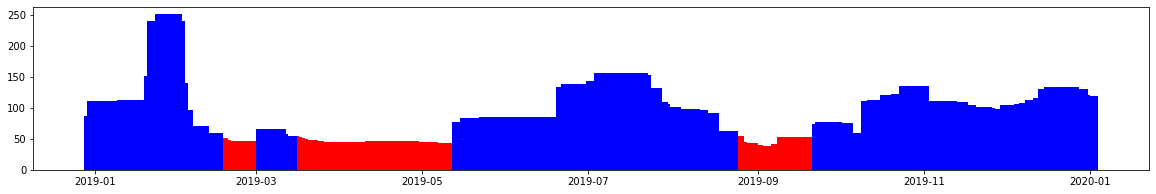

0.9962627996740172
0.9955040869652636
MODE: 20.5216
MEAN: 29.5126707216973
MEDIAN: 29.58185185185186
TOMATE
-
MOPK


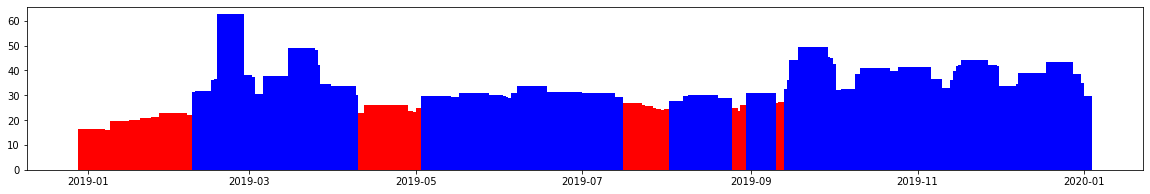

0.9438234240830038
0.9821627030118584
MODE: 115.0
MEAN: 136.60168067226888
MEDIAN: 132.0
TOMILLO
-
MOPK


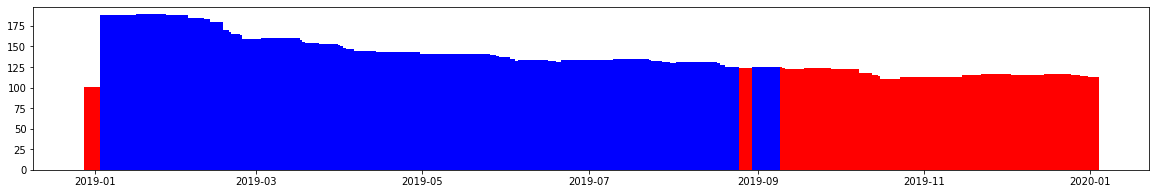

0.9836809862852983
0.9849950896065062
MODE: 10.462
MEAN: 13.2594495653033
MEDIAN: 11.681428571428572
ZANAHORIA
-
MOPK


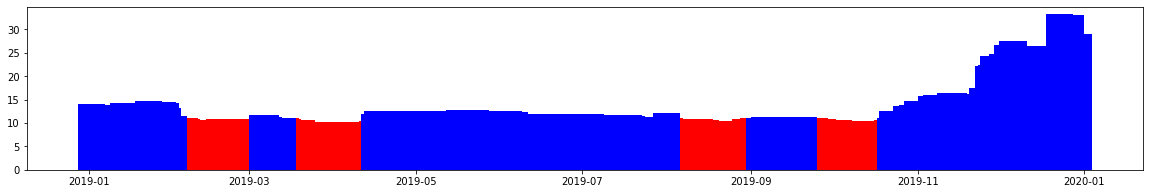

0.9799725684681366
0.9776892373604138
MODE: 6.357142857142856
MEAN: 18.627667877650243
MEDIAN: 17.182499999999997
ZAPALLITO
-
MOPK


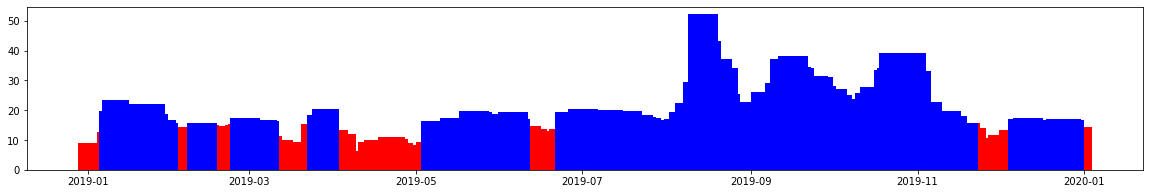

0.9875850600967755
0.9888928304800982
MODE: 10.6075
MEAN: 18.02146276844071
MEDIAN: 14.661666666666667
ZAPALLO
-
MOPK


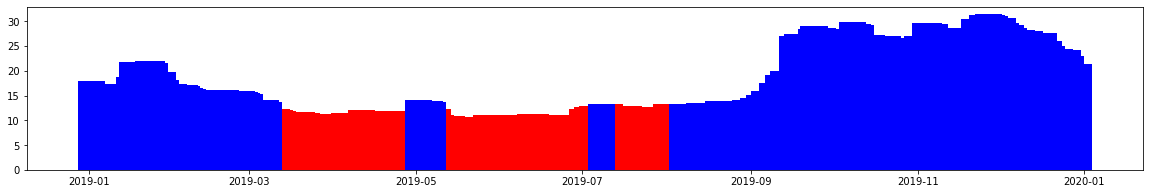

In [16]:
procesed_frame = None
for veg in veg_names:
    frame_for_one = frame_for_veg(frame, veg)
    print(frame_for_one['MAPK'].corr(frame_for_one['MOPK']))
    print(frame_for_one['MIPK'].corr(frame_for_one['MOPK']))
    print("MODE: {}".format(frame_for_one['MOPK'].mode()[0]))
    print("MEAN: {}".format(frame_for_one['MOPK'].mean()))
    print("MEDIAN: {}".format(frame_for_one['MOPK'].median()))
    print(veg)
    print('-')
    
    frame_for_one = generate_in_season_attribute(frame_for_one,90)
    diff_from_avg = frame_for_one['MOPK'] - frame_for_one['MOPK'].apply('mean')
    frame_for_one = frame_for_one.assign(MOPK_diff=diff_from_avg)
    frame_for_one['veg_name'] = veg
    show_date_plot(frame_for_one,'MOPK')
    #show_date_plot(frame_for_one,'MIPK')
    #show_date_plot(frame_for_one,'MAPK')
    
    if procesed_frame is not None:
        procesed_frame = pd.concat([procesed_frame, frame_for_one])
    else:
        procesed_frame = frame_for_one
    

In [17]:
#TODO 0:quitar los que tienen 0 y quedarme con las 90 primeras fechas en una lista --listo
#TODO 0.1: fix January is missing, on processed data, finish vegetables per day. 
#TODO 1: get all vegetables in season for any date(check how many there are for a given date).
#TODO 1.2: get rank of every vegetable, distance to its mean for every date.
#TODO 2. check if the cut is sort of correct, in season/out_season
#TODO 3. or something a bit more complex using that and variance getting some months with season for each vegetable?
#TODO 0.1: get all graphics and print them toghether to pdf? optional


In [18]:
#histogram

#frame_for_one.hist(column='MOPK')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd85774fc18>]],
      dtype=object)

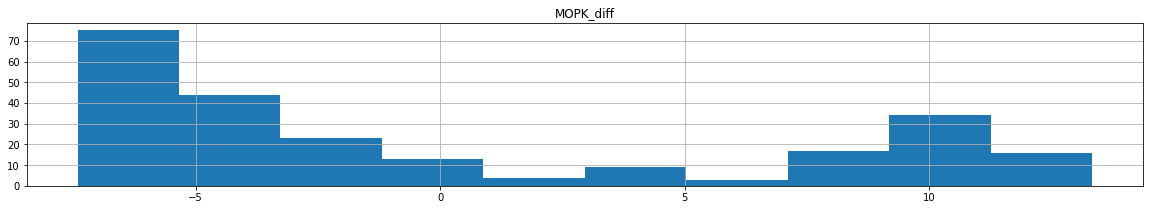

In [19]:
frame_for_one.hist(column='MOPK_diff')

In [20]:
# get for each day all the vegetables in season and show as graphic

In [21]:
# get vegetables for a date
# procesed_frame[(procesed_frame['fecha']=='2019-09-20') & (procesed_frame['in_season']==True)]['veg_name'].count()


In [24]:
df_ = pd.DataFrame(index=['fecha'], columns=['fecha', 'vegetables'])
#pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'])
#IMPORTANT CHANGE, SET ALL AS A LIST OF LIST INSTEAD OF APPENDING.
# https://stackoverflow.com/a/62734983/8997597
#In [36]: result = df1.append(s2, ignore_index=True)
fecha = '2019-{}-{}'
for month in months.items():
    for day in days:
        vegetables = procesed_frame[(procesed_frame['fecha']==fecha.format(month[1],day)) & (procesed_frame['in_season']==True)]['veg_name']
        my_serie = pd.Series([fecha.format(month[1],day), vegetables],index=['fecha', 'vegetables'])
        df_.append(my_serie, ignore_index=True)
        

In [23]:
df_

,fecha,vegetables
fecha,NaN,NaN
